## IMPORT REQUIRED LIBRARIES

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [87]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## CHANGE / DROP COLUMNS

In [90]:
df.columns=["id", "sepal_lenght", "sepal_width", "petal_length", "petal_wwidth", "species"]
del df["id"]

In [92]:
df

,sepal_lenght,sepal_width,petal_length,petal_wwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## CHECK CORRELATION

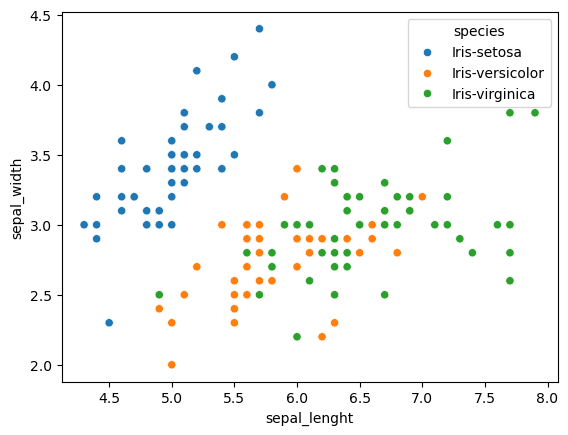

In [95]:
sns.scatterplot(data=df, x="sepal_lenght", y="sepal_width", hue="species")
plt.show()

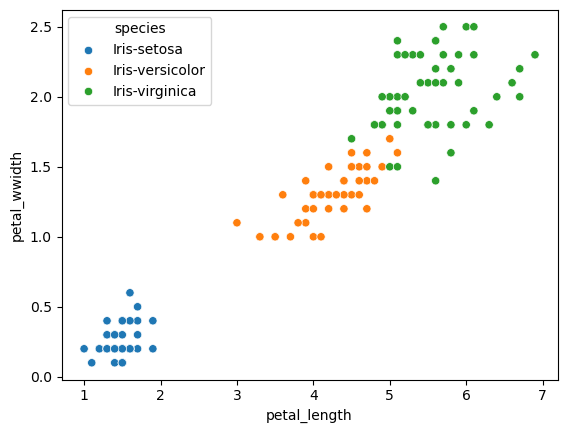

In [97]:
sns.scatterplot(data=df, x="petal_length", y="petal_wwidth", hue="species")
plt.show()

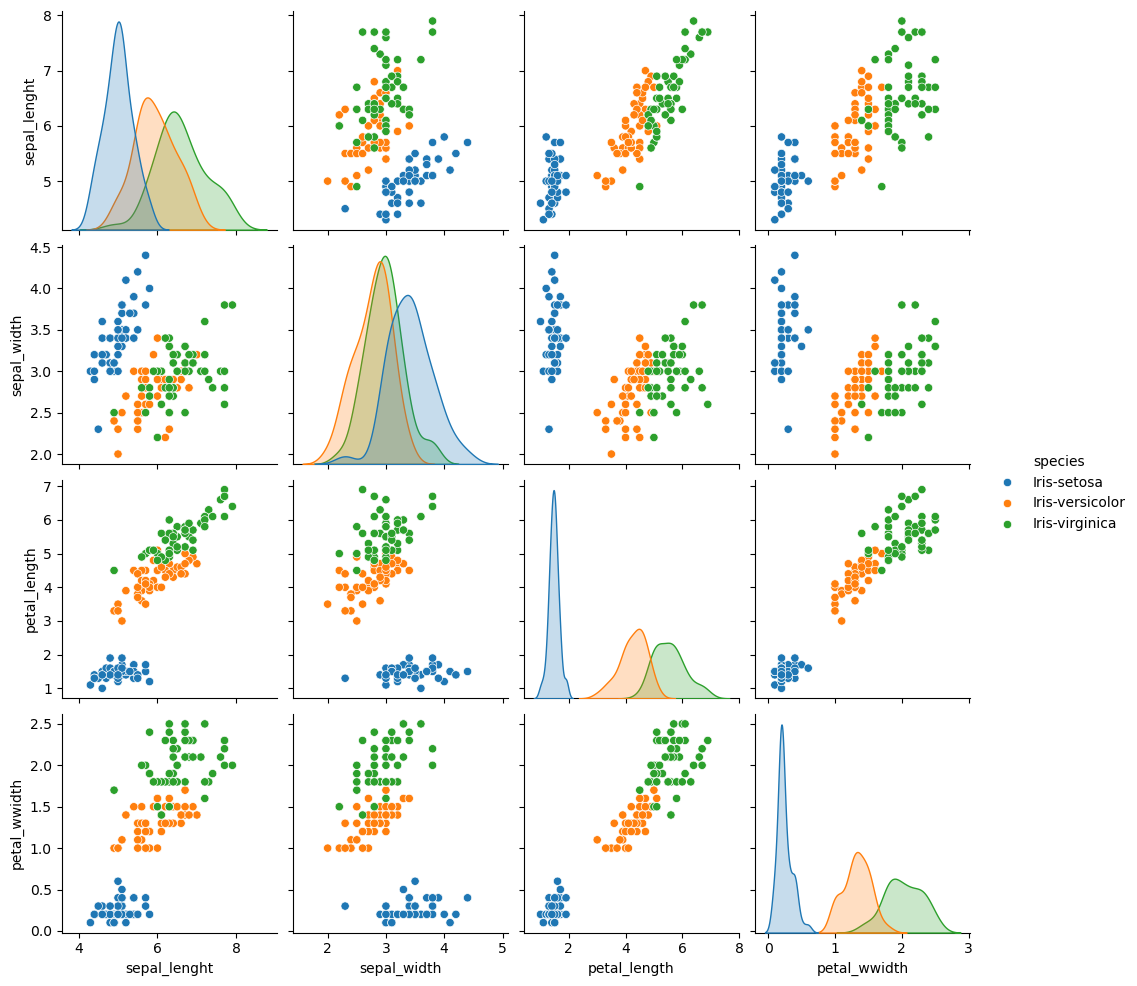

In [99]:
sns.pairplot(df, hue="species")

#### CONCLUSION -> IRIS SETOSA CAN BE EASILY DIFFERENTIATED FROM OTHER TWO

## SELECT INDEPENDENT AND DEPENDENT VARTIABLE FOR TRAIN TEST SPLIT

In [105]:
df1 = df.drop(columns="species")
X = df1 # INDEPENDENT VARIABLE
y = df["species"] # DEPENDENT VARIABLE

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30) # SPLIT DATA INTO TRAINA ND TEST 70/30

## MODEL 1 -> KNEIGHBORS CLASSIFICATION 

In [110]:
kn = KNeighborsClassifier(n_neighbors=3) # NUMBER OF NEIGHBORS / SPECIES

In [112]:
kn.fit(X_train, y_train) # FIT DATA INTO MODEL

KNeighborsClassifier(n_neighbors=3)

In [114]:
y_pred = kn.predict(X_test)

In [116]:
print("Accuracy is : ", round(accuracy_score(y_pred, y_test)*100,0))

Accuracy is :  100.0


## MODEL 2 -> SUPPORT VECTOR CLASSIFICATION

In [119]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [121]:
predict_sv = sv.predict(X_test)

In [123]:
print("Accuracy is : ", round(accuracy_score(predict_sv, y_test)*100, 0))

Accuracy is :  98.0


#### CONCLUSION -> GOING FURTHER WITH KN MODEL AS HIGH ACCURACY  

## SAMPLE PREDICTION USING

In [146]:
X_new = np.array([[3, 2, 1, 4], [4.9, 3, 2.2, 1]])
prediction = kn.predict(X_new)


Prediction of species : ['Iris-setosa' 'Iris-setosa']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [148]:
print("Prediction of species : {}".format(prediction))

Prediction of species : ['Iris-setosa' 'Iris-setosa']
